In [19]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv("diabetes.csv")
X = df.drop(["diabetes"],1)
y = df["diabetes"]
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
cols = list(X)
X = pd.DataFrame(scaler.fit_transform(X),columns=cols)
from sklearn.model_selection import train_test_split as tts
X_train, X_test,y_train,y_test= tts(X,y,random_state = 42, test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
model1 = DecisionTreeClassifier(random_state=42)
model2 = KNeighborsClassifier()
model3= LogisticRegression(random_state=42)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

In [2]:
# import statistics as sp
# final_pred = np.array([])
# for i in range(0,len(x_test)):
#     final_pred = 
#     np.append(final_pred, sp.mode([pred1[i], pred2[i], pred3[i]]))

In [33]:
final=[]
import statistics as sp
for x in range(len(pred1)):
    final.append((sp.mode([pred1[x], pred2[x],pred3[x]])))
    

In [36]:
import numpy as np
final = np.array(final)

In [38]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,pred3)

0.7359307359307359

In [44]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('dtc', model1), ('knn', model2), ('log', model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7316017316017316

In [45]:
from sklearn.ensemble import BaggingClassifier

In [65]:
bc = BaggingClassifier(random_state=42, n_estimators=100, base_estimator=model2, n_jobs=-1, oob_score=True)

In [66]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [67]:
bc.score(X_test,y_test)

0.6883116883116883

In [68]:
bc.oob_score_

0.74487895716946

In [69]:
bc.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.81395349, 0.18604651],
       ...,
       [0.13529412, 0.86470588],
       [0.16666667, 0.83333333],
       [1.        , 0.        ]])

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=80,min_samples_split=0.19, random_state=42)

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.19,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [93]:
rfc.score(X_test,y_test)

0.7619047619047619

In [94]:
ok = pd.Series(rfc.feature_importances_, index= list(X))

In [95]:
ok = ok.sort_values(ascending=True)

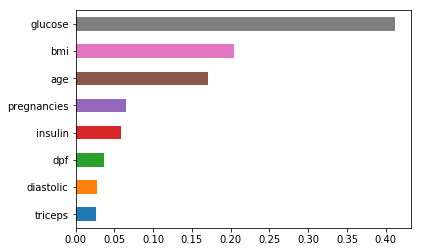

In [96]:
ok.plot(kind = "barh")

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346
